## Supervised Learning
## Project: Finding Donors for *CharityML*

In [1]:
from numpy.random import seed
seed(1)
import random
random.seed(2)
import tensorflow as tf
tf.random.set_seed(2)
import os
import glob
import pandas as pd
import numpy as np
from numpy import genfromtxt
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from numpy import asarray
from numpy import savetxt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler ,MinMaxScaler,KBinsDiscretizer, RobustScaler
from sklearn import metrics
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
import tensorflow.keras.layers as tfl
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import regularizers , Sequential
from tensorflow.python.framework import ops
from tensorflow.keras import backend as K
from sklearn.metrics import accuracy_score
# from keras.utils.conv_utils import convert_kernel
# import tensorflow_datasets as tfds
import imageio
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.applications.resnet_v2 import preprocess_input, decode_predictions
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Add, Dense, Softmax,Activation, ZeroPadding2D, BatchNormalization,Permute,Multiply, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D , TimeDistributed , Bidirectional ,Reshape,LSTM,Dropout,RepeatVector,Attention
from tensorflow.keras.initializers import random_uniform, glorot_uniform, constant, identity
from tensorflow.python.framework.ops import EagerTensor
from tensorflow.keras.models import Model
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
import graphviz
import pydot
import pydotplus
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
import seaborn as sns
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids 
from imblearn.combine import SMOTEENN , SMOTETomek
from sklearn.model_selection import train_test_split
import math


In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

In [2]:
data.shape

(45222, 14)

In [3]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [4]:
# TODO: Total number of records
n_records = len(data)

# TODO: Number of records where individual's income is more than $50,000
samples_greter_50k = data.loc[data['income'] == '>50K']
n_greater_50k = len(samples_greter_50k)

# TODO: Number of records where individual's income is at most $50,000
samples_at_most_50k = data.loc[data['income'] == '<=50K']
n_at_most_50k = len(samples_at_most_50k)

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k/n_records)*100

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


** Featureset Exploration **

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

C:\Users\Hoba\FWD\FWDPROJECT\visuals.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


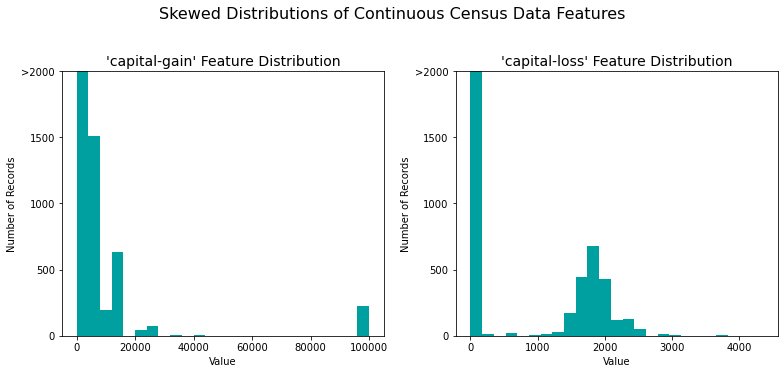

In [5]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

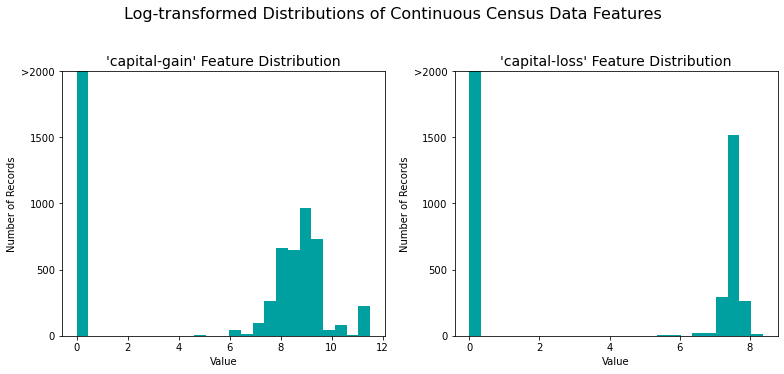

In [6]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

In [7]:
# Import sklearn.preprocessing.MinaMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [8]:
# One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# Encode the 'income_raw' data to numerical values
income = income_raw.replace({"<=50K": 0, ">50K": 1})

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

print (encoded)

103 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_level_ 10th', 'education_level_ 11th', 'education_level_ 12th', 'education_level_ 1st-4th', 'education_level_ 5th-6th', 'education_level_ 7th-8th', 'education_level_ 9th', 'education_level_ Assoc-acdm', 'education_level_ Assoc-voc', 'education_level_ Bachelors', 'education_level_ Doctorate', 'education_level_ HS-grad', 'education_level_ Masters', 'education_level_ Preschool', 'education_level_ Prof-school', 'education_level_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ A

In [9]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


*Note: this Workspace is running on `sklearn` v0.19. If you use the newer version (>="0.20"), the `sklearn.cross_validation` has been replaced with `sklearn.model_selection`.*

----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

In [10]:
# Calculate accuracy, precision and recall
TP = np.sum(income)
FP = income.count() - TP
TN = 0
FN = 0
beta = 0.5

accuracy = (TP+TN)/(TP+TN+FP+FN)
recall = TP/(TP+FN)
precision = TP/(TP+FP)

# Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
fscore = (1+beta**2) * ((precision*recall)/(((beta**2)*precision)+recall))

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) ****
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

In [11]:
# Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score, roc_auc_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size],y_train[:sample_size])
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end-start
        
    # Get the predictions on the test set(X_test),
    # then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    #  Calculate the total prediction time
    results['pred_time'] = end-start
            
    #  Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:300],predictions_train)
        
    #  Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    #  Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train[:300],predictions_train,beta=0.5)
        
    #  Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test,predictions_test,beta=0.5)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation

- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

In [12]:
X_train.shape

(36177, 103)

RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.
GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.
AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.
AdaBoostClassifier trained on 36177 samples.


C:\Users\Hoba\FWD\FWDPROJECT\visuals.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  pl.tight_layout()


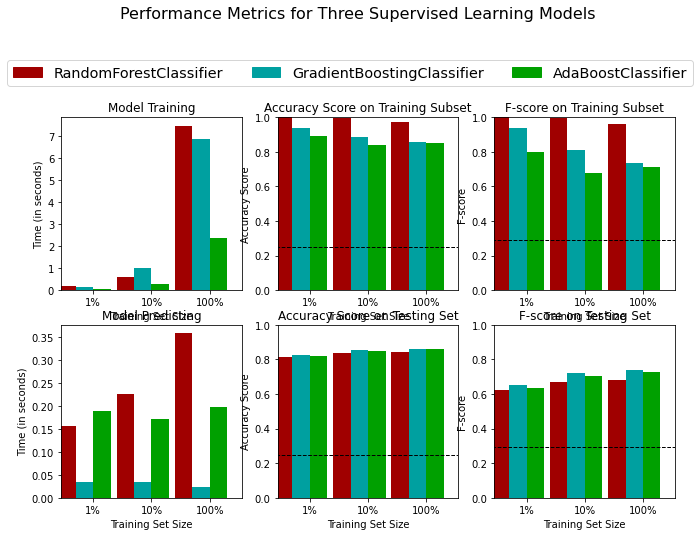

In [13]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier

#  Initialize the three models
clf_A = RandomForestClassifier(random_state=1)
clf_B = GradientBoostingClassifier(random_state=1)
clf_C = AdaBoostClassifier(random_state=1)

#  Calculate the number of samples for 1%, 10%, and 100% of the training data
#  samples_100 is the entire training set i.e. len(y_train)
#  samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
#  samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(len(y_train)/10)
samples_1 = int(len(y_train)/100)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

##### F-score (100% of the data):
Looking at the F-score at training dataset and testing dataset, we can see that RandomForestClassifier achieves the highest F-score on the training dataset, and AdaBoost Classifier achieves the highest F-score on the testing dataset. While Logistic Regression technique performs moderately compared to the other two models.
##### Prediction/Training time:
In both prediction and training times, Logistic Regression model acheives fastest performance, RandomForestClassifier model comes in the second place, while AdaBoostClassifier takes the longest time. Knowing that, compared to other techniques like (SVM and KNN), the three models are much quicker in both training and predicting.
##### The Algorithm suitability for the data
First: RandomForest Classifier seems to be overfitting the data, as it achieves very high accuracy and F-score on the training dataset, while other two models achieve better performance on the testing dataset.
Second: Logistic Regression model tuning is limited, and the assumption of linearity between data features makes it harder to inhance its performance by tuning.
Third: AdaBoost Classifier is easy to tune where only adjusting the values of learning_rate and n_estimators will be enough for getting the best parameters.
##### Conclusion
Having AdaBoost Classifier achieving the best performance on testing dataset, and compared to other algorithms, AdaBoost achieves reasonable training and predicting time, much easy to implement and tune. Hence, AdaBoost classifier is selected to be the most suitable algorithm for this dataset.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [22]:
#  Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import  make_scorer
#  Initialize the classifier
clf = GradientBoostingClassifier(random_state=0)

#  Create the parameters list you wish to tune, using a dictionary if needed.
#  parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
# parameters = {'n_estimators':[10,15,20,30,50,100],'max_depth':[10,12,15,17,20,25,30],'min_samples_split': [10,15,20,25,30,50],
#               'min_samples_leaf':[5,7,10,15,20,25]}
# parameters = {'n_estimators':[25,50,100,200,300,400,450,500],'learning_rate':[1, 1.25,1.5]}
parameters = {'n_estimators':[100,200,250,300],'max_depth':[3, 4, 5, 6]}

#  Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score,beta=0.5)

#  Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf,parameters,verbose=3)

#  Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train,y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END .....max_depth=3, n_estimators=100;, score=0.857 total time=   5.2s
[CV 2/5] END .....max_depth=3, n_estimators=100;, score=0.869 total time=   5.0s
[CV 3/5] END .....max_depth=3, n_estimators=100;, score=0.862 total time=   5.0s
[CV 4/5] END .....max_depth=3, n_estimators=100;, score=0.859 total time=   5.0s
[CV 5/5] END .....max_depth=3, n_estimators=100;, score=0.864 total time=   5.2s
[CV 1/5] END .....max_depth=3, n_estimators=200;, score=0.864 total time=  10.8s
[CV 2/5] END .....max_depth=3, n_estimators=200;, score=0.873 total time=  10.9s
[CV 3/5] END .....max_depth=3, n_estimators=200;, score=0.866 total time=  10.5s
[CV 4/5] END .....max_depth=3, n_estimators=200;, score=0.864 total time=  10.0s
[CV 5/5] END .....max_depth=3, n_estimators=200;, score=0.869 total time=  10.2s
[CV 1/5] END .....max_depth=3, n_estimators=250;, score=0.866 total time=  12.5s
[CV 2/5] END .....max_depth=3, n_estimators=250;

In [23]:
predictions = (clf.fit(X_train, y_train)).predict(X_train)
best_predictions = best_clf.predict(X_train)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_train, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_train, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_train, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_train, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8657
F-score on testing data: 0.7530

Optimized Model
------
Final accuracy score on the testing data: 0.8815
Final F-score on the testing data: 0.7817


In [27]:
clf_C = GradientBoostingClassifier(n_estimators=250, max_depth=5, random_state=0).fit(X_train[:],y_train[:])
p = clf_C.predict(X_test)
print (roc_auc_score(y_test,p), accuracy_score(y_test,p), fbeta_score(y_test, p, beta = 0.5))

p2 = clf_C.predict(X_train)
print (roc_auc_score(y_train,p2), accuracy_score(y_train,p2),  fbeta_score(y_train, p2, beta = 0.5))

0.8002461510920158 0.872415699281371 0.7546973943735077
0.8238106556419565 0.8861154877408298 0.7900479044919866


In [39]:
best_clf = GradientBoostingClassifier(n_estimators=250, max_depth=5, random_state=0)

In [40]:
best_predictions = best_clf.fit(X_train, y_train).predict(X_test)

### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results on train:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |    0.8657         |      0.8861     |
| F-score        |     0.7530        |   0.7900        |


#### Results on test:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |    0.8630         |      0.8724     |
| F-score        |     0.7395        |  0.7546        |


In [29]:
best_clf.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 250,
 'n_iter_no_change': None,
 'random_state': 0,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

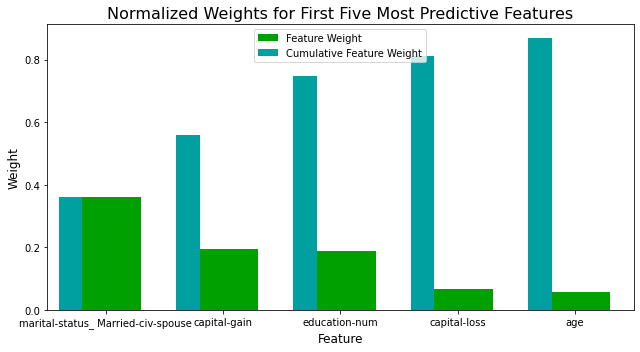

In [36]:
# TODO: Import a supervised learning model that has 'feature_importances_'


# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model =  best_clf.fit(X_train[:],y_train[:])

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

In [37]:
importances

array([5.66184320e-02, 1.89377849e-01, 1.96014154e-01, 6.53130105e-02,
       3.58748919e-02, 2.63989053e-03, 2.07553514e-03, 1.20584726e-03,
       1.18886502e-03, 6.00774983e-03, 9.11319406e-04, 5.51825749e-05,
       2.85968312e-04, 1.86083154e-04, 1.01697211e-04, 4.11796003e-05,
       3.07068675e-04, 3.02435412e-04, 9.21536058e-05, 5.78450146e-04,
       7.11045379e-04, 9.29709715e-04, 2.64191102e-04, 3.08143742e-04,
       1.24443314e-03, 1.08209939e-04, 1.61042604e-03, 7.76654645e-04,
       4.71247712e-04, 9.01102595e-04, 3.61620778e-01, 5.54157022e-04,
       8.98652835e-04, 2.81917147e-04, 6.51643492e-04, 7.44437693e-04,
       0.00000000e+00, 5.43331540e-04, 1.55940285e-02, 5.55105000e-03,
       1.26214974e-03, 1.02192551e-03, 6.16487004e-03, 2.67670892e-05,
       8.10968197e-03, 1.19415896e-03, 2.35913513e-03, 1.69688353e-03,
       6.85941208e-04, 2.29632941e-03, 5.54766783e-04, 3.82684538e-04,
       4.20468695e-04, 4.67739324e-04, 4.46765771e-03, 2.90599420e-04,
      

In [47]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf =  best_clf.fit(X_train_reduced, y_train)

# Make new predictions

reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8724
F-score on testing data: 0.7547

Final Model trained on reduced data
------
Accuracy on testing data: 0.8578
F-score on testing data: 0.7218


In [48]:
start = time() 
learner = best_clf.fit(X_train,y_train)
end = time() 
end-start

28.93386435508728

In [49]:
start = time()
learner = best_clf.fit(X_train_reduced,y_train)
end = time() 
end-start

4.796058177947998

In [54]:
start = time()
learner = GradientBoostingClassifier().fit(X_train,y_train)
end = time() 
end-start

6.690516710281372

In [55]:
y_pred_default = learner.predict(X_test)
print("Accuracy score with default values of AdaBoostClassifier ",accuracy_score(y_test,y_pred_default))
print("F-score with default values of AdaBoostClassifier ",fbeta_score(y_test,y_pred_default,beta=0.5))

Accuracy score with default values of AdaBoostClassifier  0.8630182421227197
F-score with default values of AdaBoostClassifier  0.7395338561802719


In [56]:
start = time()
learner = GradientBoostingClassifier().fit(X_train_reduced,y_train)
end = time() 
end-start

1.127044916152954

In [57]:
y_pred_default = learner.predict(X_test_reduced)
print("Accuracy score with default values of AdaBoostClassifier with reduced data ",accuracy_score(y_test,y_pred_default))
print("F-score with default values of AdaBoostClassifier with reduced data ",fbeta_score(y_test,y_pred_default,beta=0.5))

Accuracy score with default values of AdaBoostClassifier with reduced data  0.8589275843007186
F-score with default values of AdaBoostClassifier with reduced data  0.7338867750490027


In [29]:
!!jupyter nbconvert *.ipynb

['[NbConvertApp] Converting notebook finding_donors.ipynb to html',
 '[NbConvertApp] Writing 557793 bytes to finding_donors.html']